In [1]:
import numpy as np
import pandas as pd
import os

from bec import *
from monet import *
import al_utils
from pathlib import Path


import warnings
warnings.filterwarnings('ignore')

np.random.seed(69)

In [2]:
class OpticalLattice:
    config = get_optical_lattice_config()
    sims = [ sim(g, config) for g in np.linspace(0.1, 10, 100) ]
    tr, _, _ = make_dataset(sims)
   
def evaluate(gp, harmonic_sims, low=1, high=100, n=100):
    
    def _evaluate(g):
        gt = get_closest_sim(harmonic_sims, g)
        pr, pr_sigma = gp.predict(gt[['x', 'g']])
        return ((pr - gt.psi)**2).sum().mean()
    
    return np.array([_evaluate(g) for g in np.linspace(low, high, n)]).mean()

In [3]:
gp = GPApproximation()
optical_lattice_data = OpticalLattice.tr.sample(500)
print(f"### Created Train, Test and Validation Sample")

gp.fit(optical_lattice_data[['x', 'g']], optical_lattice_data.psi)
OpticalLattice.gp = gp
print(f"### Trained GP in train dataset")



### Created Train, Test and Validation Sample
### Trained GP in train dataset


In [4]:
Optical_loss_gp = evaluate(gp, OpticalLattice.sims, low=10, high=20)
print(f"### Loss of the trained GP - {Optical_loss_gp}")



### Loss of the trained GP - 0.006647716179294411


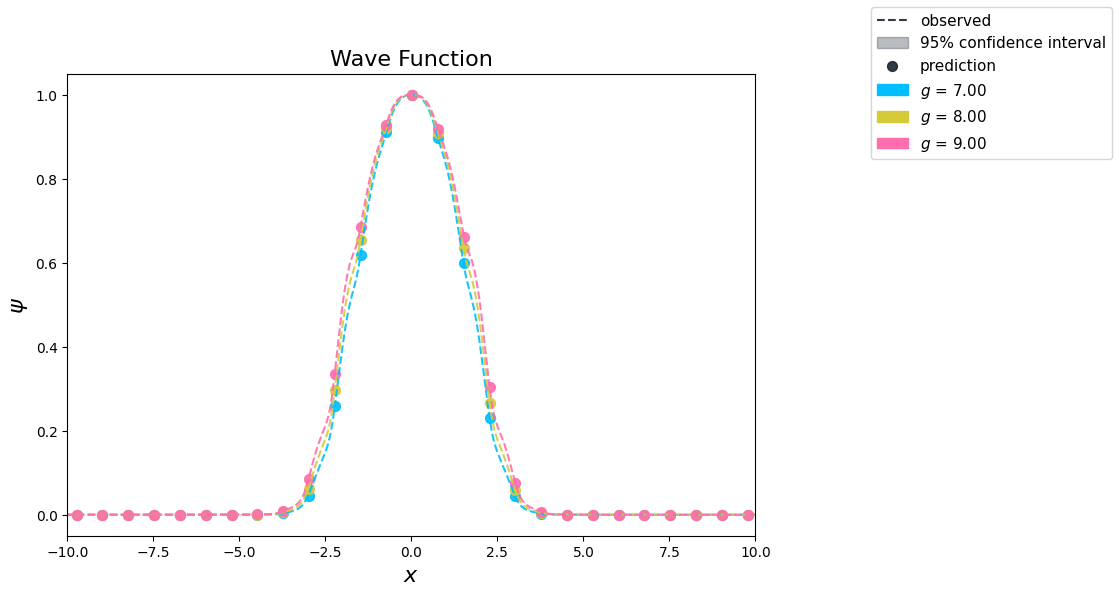

In [13]:
save_path = "OpticalLattice_exp"
if os.path.isdir(save_path) == False:
    os.mkdir(save_path)
al_utils.plot([7, 8, 9],OpticalLattice.sims, gp, save_file=os.path.join(save_path, f'{save_path}.svg'),act_op=False, min_gs=-10, max_gs=10)



###Starting active learning Process
Loss for 51 - nan
Got min loss
Loss for 52 - 2.223350520225254
Got min loss
Loss for 53 - 2.2117812711920615
Got min loss
Loss for 54 - 0.6177243114877355
Got min loss
Loss for 55 - 0.29120009431456223
Got min loss
Loss for 56 - 0.28971753050856885
Got min loss
Loss for 57 - 0.2892648501812625
Got min loss
Loss for 58 - 0.2764203211571962
Got min loss
Loss for 59 - 0.26298262926269517
Loss for 60 - 0.3015532211171885
Loss for 61 - 0.3002632592183163
Loss for 62 - 0.3196535473024466
Loss for 63 - 0.3210473552737226
Loss for 64 - 0.32049397224496984
Loss for 65 - 0.31993839713411626
Loss for 66 - 0.404716672383647
Loss for 67 - 0.40079728858902425
Loss for 68 - 0.4012434944259686
Loss for 69 - 0.41467553026626003
Loss for 70 - 0.3387377423552695
Got min loss
Loss for 71 - 0.26178855396990053
Loss for 72 - 0.2695095765854916
Loss for 73 - 0.26975800926623544
Loss for 74 - 0.2700242734152731
Loss for 75 - 0.2721005437163154
Loss for 76 - 0.27206325717083


KeyboardInterrupt



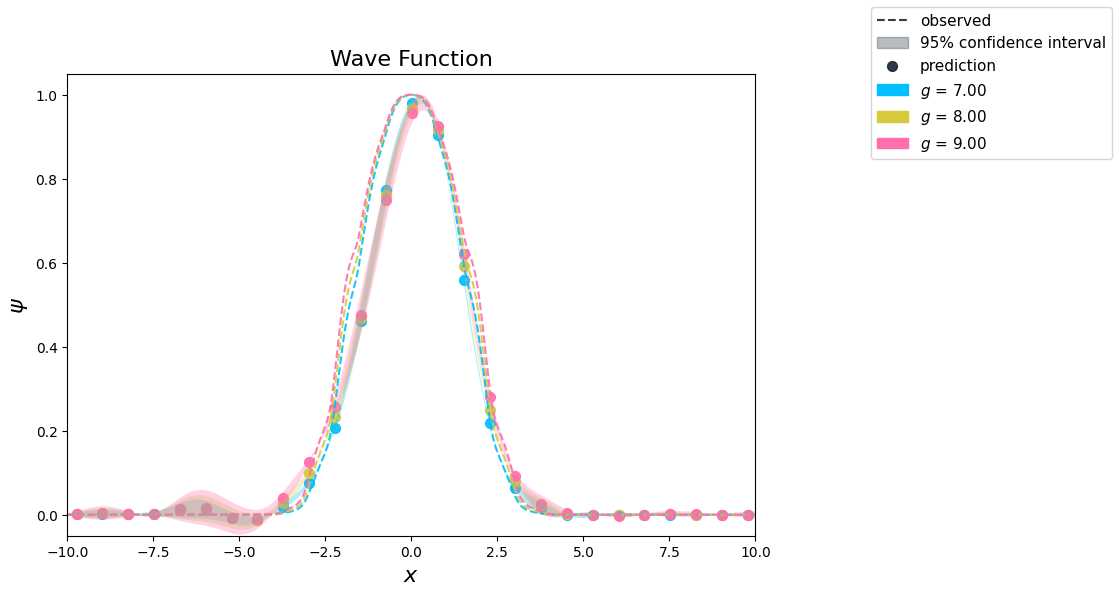

Error in callback <function flush_figures at 0x7f2c49293940> (for post_execute):


In [ ]:
print(f"###Starting active learning Process")
kernel = C(1.0, (1e-3, 1e3)) * RBF([5, 5], (1e-2, 1e2))
regressor = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=15)
ids = [int(i) for i in np.linspace(0, len(OpticalLattice.tr)-1, 50)]
aclrnr = al_utils.ActLearn(
    regressor=regressor,
    init_ids=ids,
    trn_data=OpticalLattice.tr,
    save_path=save_path,
    compare_loss=Optical_loss_gp,
    exp_name='VTP_OpticalLattice'
)

aclrnr.train(OpticalLattice.sims, low=10, high=20,gs=[7, 8, 9], min_gs=-10, max_gs=10)


